This note book for concatinate 3 csv file (wsdata_train_cn, wsdata_test_cn, wsdata_val_cn) to 1 csv file and preprocessing this data, the final output for use in model is wsdata_all.csv

# Install library

In [ ]:
pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 51.9 MB/s eta 0:00:00


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=80395d5ab54cefcb3881089b2603765e24f82350c5e3a0afafa788a0ae84b328
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 14.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import emoji

# Import Data

In [ ]:
from datasets import load_dataset

dataset = load_dataset("wisesight_sentiment")

Generating train split:   0%|          | 0/21628 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2404 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2671 [00:00<?, ? examples/s]

Dataset wisesight_sentiment downloaded and prepared to /root/.cache/huggingface/datasets/wisesight_sentiment/wisesight_sentiment/1.0.0/fc2b1bdfe79571b2e281e4afdb5aac069cf9270bf0f85694239be672a4191969. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['texts', 'category'],
        num_rows: 21628
    })
    validation: Dataset({
        features: ['texts', 'category'],
        num_rows: 2404
    })
    test: Dataset({
        features: ['texts', 'category'],
        num_rows: 2671
    })
})

In [ ]:
df_train = pd.DataFrame(dataset['train'])
df_train.head()

,texts,category
0,ไปจองมาแล้วนาจา Mitsubishi Attrage ได้หลังสงกร...,1
1,เปิดศักราชใหม่! นายกฯ แถลงข่าวก่อนการแข่งขันศึ...,1
2,บัตรสมาชิกลดได้อีกไหมคับ,1
3,สนใจ new mazda2ครับ,1
4,😍😍,0


In [ ]:
# Save the DataFrame to a CSV file
df_train.to_csv('wsdata_train_cn.csv', index=False)

In [ ]:
df_val = pd.DataFrame(dataset['validation'])
# Save the DataFrame to a CSV file
df_val.to_csv('wsdata_val_cn.csv', index=False)

In [ ]:
df_test = pd.DataFrame(dataset['test'])
# Save the DataFrame to a CSV file
df_test.to_csv('wsdata_test_cn.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# read data from csv file
df1 = pd.read_csv('/content/drive/MyDrive/wsdata_train_cn.csv', delimiter=',')
df2 = pd.read_csv('/content/drive/MyDrive/wsdata_val_cn.csv', delimiter=',')
df3 = pd.read_csv('/content/drive/MyDrive/wsdata_test_cn.csv', delimiter=',')

# Concatinate All Dataframe

In [ ]:
# concatenating all df along rows
df = pd.concat([df1, df2, df3], axis=0)

# Reset index

In [ ]:
df = df.reset_index(drop=True)

# Save to CSV

In [ ]:
from google.colab import files
df.to_csv("wsdata.csv",encoding="utf_8_sig", index=False)
files.download("wsdata.csv")

# Preprocessing Data

In [ ]:
# import csv file
df = pd.read_csv('/content/wsdata.csv', delimiter=',')

In [ ]:
df.head()

,texts,category
0,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,2
1,ครับ #phithanbkk,1
2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,2
3,Cf clarins 5 ขวด 2850,1
4,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,1


In [ ]:
df = df.rename(columns={"category": "label", "texts":"text"})

In [ ]:
df.head()

,text,label
0,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,2
1,ครับ #phithanbkk,1
2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,2
3,Cf clarins 5 ขวด 2850,1
4,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,1


<Axes: >

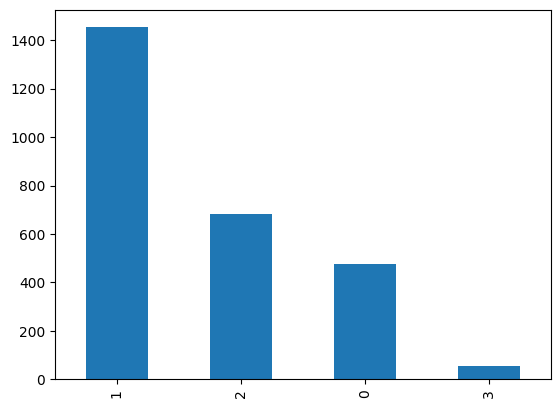

In [ ]:
CountStatus = pd.value_counts(df['label'].values)
CountStatus.plot.bar()

## Change label 3 to 1

In [ ]:
df['label'] = df['label'].replace(3, 1)

<Axes: >

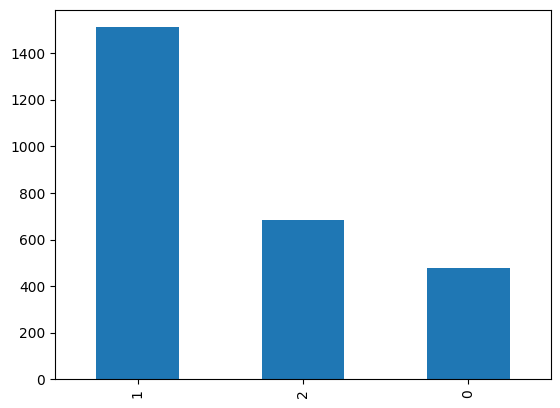

In [ ]:
CountStatus = pd.value_counts(df['label'].values)
CountStatus.plot.bar()

## Word Normalization

In [ ]:
from pythainlp.util import normalize

In [ ]:
df.loc[:, 'text'] = df.loc[:, 'text'].astype(str)

In [ ]:
df.loc[:,'text_normalize'] = df.loc[:,'text'].map(normalize)

In [ ]:
df

,text,label,text_normalize
0,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,2,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...
1,ครับ #phithanbkk,1,ครับ #phithanbkk
2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...
3,Cf clarins 5 ขวด 2850,1,Cf clarins 5 ขวด 2850
4,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,1,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...
...,...,...,...
2666,เล็กลงมา แต่ดีเท่าเดิม 😘 แวะมาหาได้ที่เซเว่นน๊...,0,เล็กลงมา แต่ดีเท่าเดิม 😘 แวะมาหาได้ที่เซเว่นน๊...
2667,แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...,1,แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...
2668,ไปเถอะดอม,0,ไปเถอะดอม
2669,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555,1,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555


## Remove Emoji

In [ ]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
df.loc[:,'text_rm_emoji'] = df.loc[:,'text_normalize'].map(remove_emojis)

In [ ]:
df.head()

,text,label,text_normalize,text_rm_emoji
0,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,2,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...
1,ครับ #phithanbkk,1,ครับ #phithanbkk,ครับ #phithanbkk
2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...
3,Cf clarins 5 ขวด 2850,1,Cf clarins 5 ขวด 2850,Cf clarins 5 ขวด 2850
4,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,1,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...


## Replace only white space cell to NA from text_rm_emoji column

In [ ]:
df['text_rm_emoji'] = df['text_rm_emoji'].apply(lambda x: x.strip()).replace('', pd.NA)

In [ ]:
df

,text,label,text_normalize,text_rm_emoji
0,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,2,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...
1,ครับ #phithanbkk,1,ครับ #phithanbkk,ครับ #phithanbkk
2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...
3,Cf clarins 5 ขวด 2850,1,Cf clarins 5 ขวด 2850,Cf clarins 5 ขวด 2850
4,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,1,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...
...,...,...,...,...
2666,เล็กลงมา แต่ดีเท่าเดิม 😘 แวะมาหาได้ที่เซเว่นน๊...,0,เล็กลงมา แต่ดีเท่าเดิม 😘 แวะมาหาได้ที่เซเว่นน๊...,เล็กลงมา แต่ดีเท่าเดิม แวะมาหาได้ที่เซเว่นน๊า...
2667,แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...,1,แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...,แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...
2668,ไปเถอะดอม,0,ไปเถอะดอม,ไปเถอะดอม
2669,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555,1,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555


## Drop text_rm_emoji that NULL

In [ ]:
df = df.dropna(subset=['text_rm_emoji'])

## Reset Index

In [ ]:
df.reset_index(inplace = True, drop = True)

In [ ]:
df

,text,label,text_normalize,text_rm_emoji
0,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,2,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...
1,ครับ #phithanbkk,1,ครับ #phithanbkk,ครับ #phithanbkk
2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...
3,Cf clarins 5 ขวด 2850,1,Cf clarins 5 ขวด 2850,Cf clarins 5 ขวด 2850
4,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,1,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...
...,...,...,...,...
2657,เล็กลงมา แต่ดีเท่าเดิม 😘 แวะมาหาได้ที่เซเว่นน๊...,0,เล็กลงมา แต่ดีเท่าเดิม 😘 แวะมาหาได้ที่เซเว่นน๊...,เล็กลงมา แต่ดีเท่าเดิม แวะมาหาได้ที่เซเว่นน๊า...
2658,แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...,1,แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...,แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...
2659,ไปเถอะดอม,0,ไปเถอะดอม,ไปเถอะดอม
2660,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555,1,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555


## Tokenize

In [ ]:
from pythainlp.tokenize import word_tokenize

In [ ]:
df.loc[:, 'text_tokenize'] = df.loc[:,'text_rm_emoji'].map(word_tokenize)
df.head()

<ipython-input-118-9b4523872be4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_tokenize'] = df.loc[:,'text_rm_emoji'].map(word_tokenize)


,text,label,text_normalize,text_rm_emoji,text_tokenize
0,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,2,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,"[ซื้อ, แต่, ผ้าอนามัย, แบบ, เย็น, มา, ค่ะ, , ..."
1,ครับ #phithanbkk,1,ครับ #phithanbkk,ครับ #phithanbkk,"[ครับ, , #, phithanbkk]"
2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,"[การ, ด่า, ไป, เหมือน, ได้, บรรเทา, ความเครียด..."
3,Cf clarins 5 ขวด 2850,1,Cf clarins 5 ขวด 2850,Cf clarins 5 ขวด 2850,"[Cf, , clarins, , 5, , ขวด, , 2850]"
4,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,1,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,"[ทาน, ได้, ค่ะ, , น้ำ, ซุป, , MK, , ต้ม, มา..."


## Remove stopword

In [ ]:
from pythainlp.corpus import thai_stopwords
stopwords = list(thai_stopwords())

In [ ]:
lst1 = []
for i in range(len(df['text_tokenize'])):
    lst2 = []
    for j in df['text_tokenize'][i]:
        if j not in stopwords:
            lst2.append(j)
    lst1.append(lst2)

In [ ]:
for i in range(len(lst1)) :
    lst1[i] = ''.join(lst1[i])

In [ ]:
df_2 = pd.DataFrame(lst1, columns = ['text_rm_sw_concat'])

In [ ]:
df = df.join(df_2)

In [ ]:
df

,text,label,text_normalize,text_rm_emoji,text_tokenize,text_rm_sw_concat
0,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,2,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,"[ซื้อ, แต่, ผ้าอนามัย, แบบ, เย็น, มา, ค่ะ, , ...",ซื้อผ้าอนามัยเย็น อีห่านอน
1,ครับ #phithanbkk,1,ครับ #phithanbkk,ครับ #phithanbkk,"[ครับ, , #, phithanbkk]",#phithanbkk
2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,"[การ, ด่า, ไป, เหมือน, ได้, บรรเทา, ความเครียด...",ด่าเหมือนบรรเทาความเครียด บีทีเอส (รถไฟฟ้า) สำ...
3,Cf clarins 5 ขวด 2850,1,Cf clarins 5 ขวด 2850,Cf clarins 5 ขวด 2850,"[Cf, , clarins, , 5, , ขวด, , 2850]",Cf clarins 5 ขวด 2850
4,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,1,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,"[ทาน, ได้, ค่ะ, , น้ำ, ซุป, , MK, , ต้ม, มา...",ทาน น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขาว เกลื...
...,...,...,...,...,...,...
2657,เล็กลงมา แต่ดีเท่าเดิม 😘 แวะมาหาได้ที่เซเว่นน๊...,0,เล็กลงมา แต่ดีเท่าเดิม 😘 แวะมาหาได้ที่เซเว่นน๊...,เล็กลงมา แต่ดีเท่าเดิม แวะมาหาได้ที่เซเว่นน๊า...,"[เล็ก, ลงมา, , แต่, ดี, เท่าเดิม, , แวะ, มา...",ลงมา ดีเท่าเดิม แวะมาหาเซเว่นน๊า #ubeer ฮิพอ...
2658,แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...,1,แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...,แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...,"[แพนด้า, ซิ่ง, , กับ, มุมมอง, ที่, แตกต่าง, อ...",แพนด้าซิ่ง มุมมองแตกต่างลงตัวสไตล์ Mu-X Face Off
2659,ไปเถอะดอม,0,ไปเถอะดอม,ไปเถอะดอม,"[ไป, เถอะ, ดอม]",ดอม
2660,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555,1,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555,"[เจมส์, , บอนด์, , ขับ, โตโยต้า, อัลติส, , ...",เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555


## Drop and rename columns

In [ ]:
df.drop(['text', 'text_normalize', 'text_rm_emoji', 'text_tokenize'], axis = 1, inplace = True)

In [ ]:
df.rename(columns = {'text_rm_sw_concat':'text'}, inplace = True)

In [ ]:
df

,label,text
0,2,ซื้อผ้าอนามัยเย็น อีห่านอน
1,1,#phithanbkk
2,2,ด่าเหมือนบรรเทาความเครียด บีทีเอส (รถไฟฟ้า) สำ...
3,1,Cf clarins 5 ขวด 2850
4,1,ทาน น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขาว เกลื...
...,...,...
2657,0,ลงมา ดีเท่าเดิม แวะมาหาเซเว่นน๊า #ubeer ฮิพอ...
2658,1,แพนด้าซิ่ง มุมมองแตกต่างลงตัวสไตล์ Mu-X Face Off
2659,0,ดอม
2660,1,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555


In [ ]:
df.to_csv("wsdata_all.csv", index=False)

------------------------------------